## Import Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go


## Load Dataset 

In [2]:
base_dir = os.getcwd()
file_path = os.path.normpath(os.path.join(base_dir, "../../", "Lecture 10/data_raw/bills_actions.csv"))
actions = pd.read_csv(file_path)


In [ ]:
display(actions)

## Question 1

### Give some basic descriptive statistics from the dataset. How many bills are there? What proportion of the bills belong to each category? What proportion of the bills belong to different types of actions within each category?

Since a bill (referenced by bill_number) might have multiple bill types (bill_type), possibly due to the bill changing over time, I will consider a unique bill to be given by the unique combination of bill_number and bill_type. 

In [3]:
# Creating a unique bill ID
actions['bill_id'] = actions['bill_number'].astype(str) + actions['bill_type']

In [4]:
# Count distinct number of bills 
num_bills = actions['bill_id'].nunique()
print("There are ", num_bills, " unique bills in the dataset.")

There are  1494  unique bills in the dataset.


In [5]:
# Proportion of bills in each category

# Grouping into category and then count unique bill_id
unique_bills_by_category = actions.groupby('category')['bill_id'].nunique()

# Computing the proportion 
proportion_bills_by_category = (unique_bills_by_category/unique_bills_by_category.sum())*100


# Preparing data for table display 

# Creating a table for display 
proportion_bills_table = pd.DataFrame({
    'Category': proportion_bills_by_category.index,
    'Proportion': proportion_bills_by_category.values
})

# Sorting values for table 
proportion_bills_table = proportion_bills_table.sort_values(by = 'Proportion', ascending = False)

# Formatting to percentage 
proportion_bills_table['Proportion'] = proportion_bills_table['Proportion'].apply(lambda x: f'{x:.2f}%')

# Storing category order 
category_order = list(proportion_bills_table['Category'])

In [6]:
# Proportion of bills in each action within each category 

# Grouping by category and main_action then count unique bill_id
unique_bills_by_cat_action = actions.groupby(['category', 'main_action'])['bill_id'].nunique()
unique_bills_by_cat_action = unique_bills_by_cat_action.reset_index()

# Taking the bill count for each category and main_action combination, then dividing by the sum of bill count in category 
proportion_bills_action_category = unique_bills_by_cat_action.groupby('category').apply(lambda x: x.assign(proportion=(x['bill_id'] / x['bill_id'].sum()) * 100))


# Preparing data for table display 

# Creating a DataFrame for display in the table
proportion_bills_action_category_table = pd.DataFrame({
    'Category': proportion_bills_action_category['category'],
    'Action': proportion_bills_action_category['main_action'],
    'Proportion': proportion_bills_action_category['proportion']  
})


# Sorting the DataFrame by proportion for better display
proportion_bills_action_category_table['Category2'] = pd.Categorical(proportion_bills_action_category_table['Category'], categories=category_order, ordered=True)
proportion_bills_action_category_table = proportion_bills_action_category_table.sort_values(by=['Category2', 'Proportion'], ascending=[True, False])
proportion_bills_action_category_table = proportion_bills_action_category_table.drop('Category2', axis = 1)
proportion_bills_action_category_table['Category'] = proportion_bills_action_category_table['Category'].mask(proportion_bills_action_category_table['Category'].duplicated(), '')

# Format the proportion column as percentages
proportion_bills_action_category_table['Proportion'] = proportion_bills_action_category_table['Proportion'].apply(lambda x: f'{x:.2f}%')



/var/folders/q1/01n67gwn27z65jnn2t76vm6w0000gn/T/ipykernel_70770/1487747958.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  proportion_bills_action_category = unique_bills_by_cat_action.groupby('category').apply(lambda x: x.assign(proportion=(x['bill_id'] / x['bill_id'].sum()) * 100))


In [32]:
# Function that creates the tables so I can include them in my answers
def create_tables(ax1, ax2, table1_data, table2_data):


    # Creating table 1
    table1 = ax1.table(cellText=table1_data.values, 
                    colLabels=table1_data.columns, 
                    cellLoc='center', 
                    loc='center')
    
    # Hide axes
    ax1.axis('tight')
    ax1.axis('off')

    # Formatting table 
    for (i, j), cell in table1.get_celld().items():
        if i == 0:  
            cell.set_facecolor('blue')  
            cell.set_text_props(color='white', weight='bold', fontsize=12)
        else:  
            pass
        cell.set_edgecolor('black')  

    # Scale the table
    table1.scale(0.8, 1.8)


    # Creating table 2
    table2 = ax2.table(cellText=table2_data.values,
                    colLabels=table2_data.columns,
                    cellLoc='center', loc='center')

    # Hide axes
    ax2.axis('tight')
    ax2.axis('off')

    # Format the table appearance
    for (i, j), cell in table2.get_celld().items():
        if i == 0:  
            cell.set_facecolor('blue')
            cell.set_text_props(color='white', weight='bold', fontsize=12)
            cell.set_edgecolor('black') 
            cell.visible_edges = 'closed'
        else:
            cell.set_edgecolor('black')
            if i == len(table2_data):
                cell.visible_edges = 'LRB'
            elif j == 0: 
                if table2_data['Category'].iloc[i - 1] == '':
                    cell.visible_edges = 'LR' 
                else:
                    cell.visible_edges = 'LRT'  
                    cell.set_text_props(color='black', weight='bold', fontsize=10)

    # Scale the table for better readability
    table2.scale(1.5, 1.8)

#### Answers

When considering the unique bill_number and bill_type combination to represent a unique bill (represented by new variable bill_id), there are 1494  unique bills in the dataset.

The proportion of bills by category, and the proportion of bills by the main action within each category are shown in the tables below. 
- House bills dominate the data, accounting for ~44% of the bills
    - House floor actions account for the majority of house bill actions at ~81%
- Senate bills also contribute significantly, comprising ~27% of the bills
    - Senate committee/subcomittee actions account for the majority of senate bill actions at ~66%
- Amendments also see considerable action, especially within floor proposals in the Senate and amendments offered in the house 
- Less common categories include house joint solutions and senate joint resolutions 


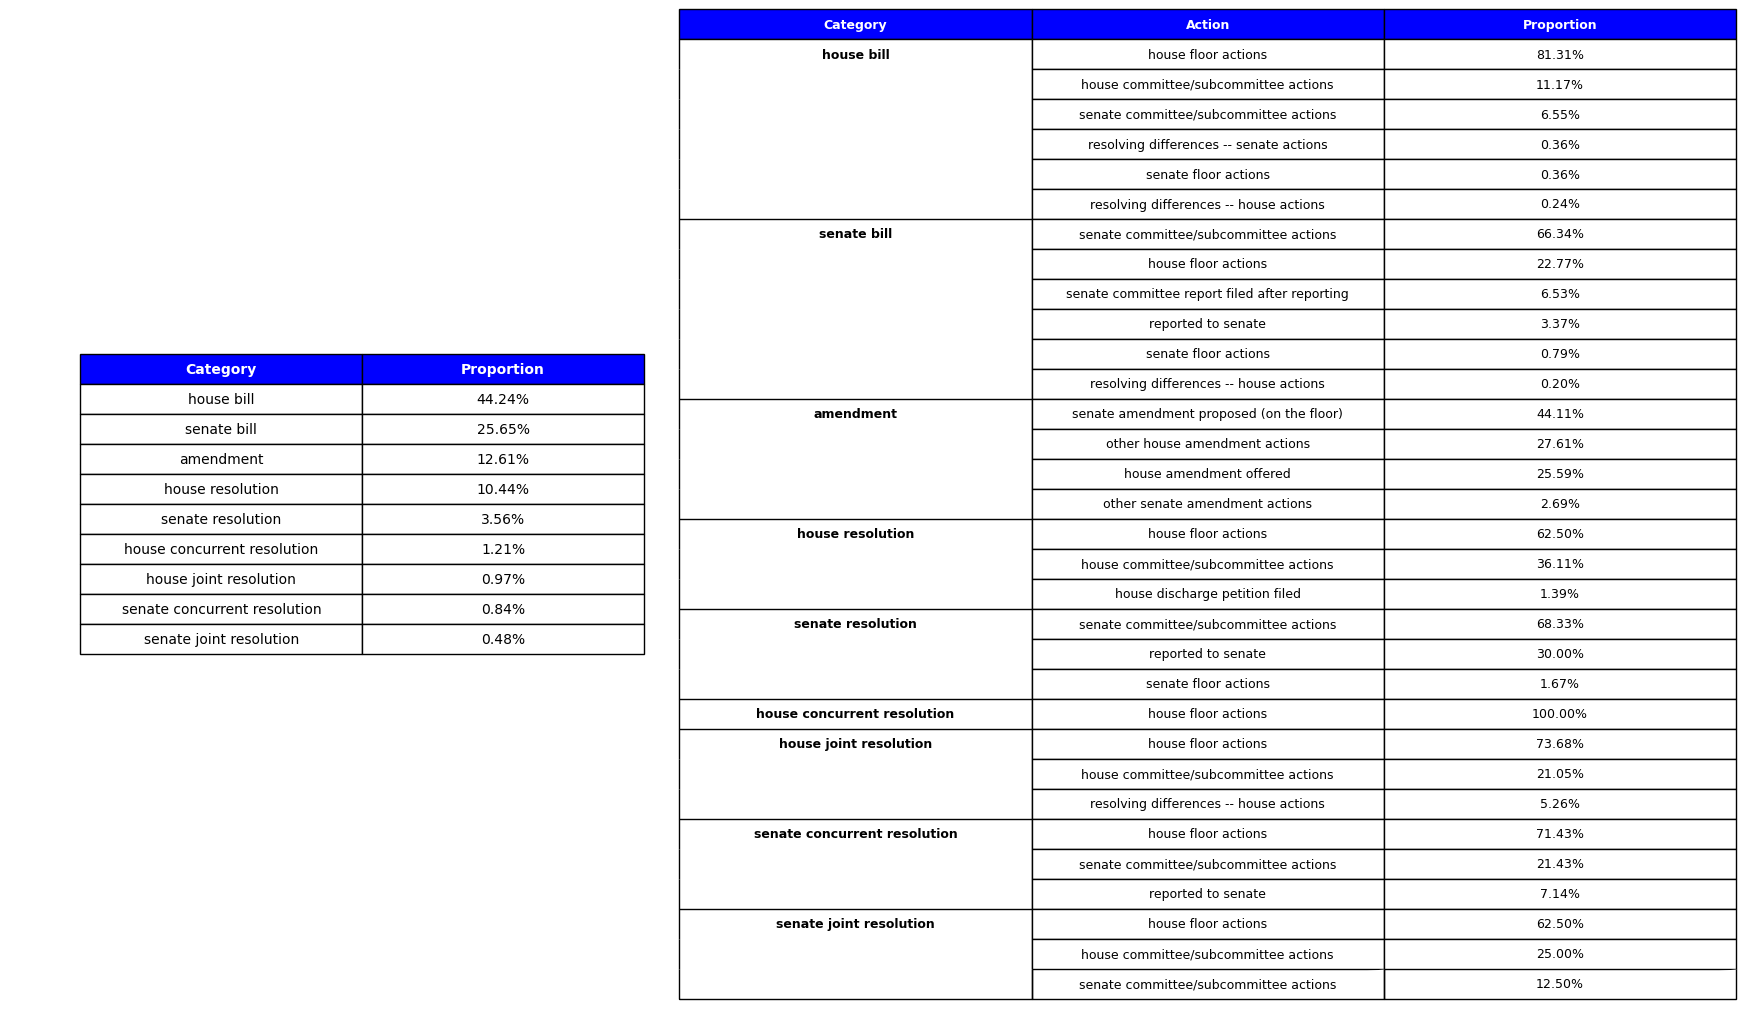

In [33]:
# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Assume table1_data and table2_data are your dataframes
create_tables(ax1, ax2, proportion_bills_table, proportion_bills_action_category_table)

# Show the figure
plt.show()

## Question 2 

### How many house floor actions are there as part of senate bills (category)?

In [17]:
# House floor actions as part of senate bills category 
house_floor_actions_in_senate_bills = actions[(actions['category'] == 'senate bill') & (actions['main_action'] == 'house floor actions')]
print("There are ", house_floor_actions_in_senate_bills.shape[0], " house floor actions in the senate bill category.")


There are  116  house floor actions in the senate bill category.


#### Answer
There are 116 house floor actions in the senate bill category. Note that there are 115 unique bills that had house floor actions in the senate bill category - bill 47s had two house floor actions in this category.

### 2a. What proportion of these actions were suspended? What proportion of these actions were suspended as amended?

In [34]:
# Number of actions that were suspended 
suspended_actions = house_floor_actions_in_senate_bills['action'].str.contains('suspend', case = False)
suspended_as_amended_actions = house_floor_actions_in_senate_bills['action'].str.contains('suspend', case=False) & house_floor_actions_in_senate_bills['action'].str.contains('as amended', case=False)

# Computing proportions 
proportion_suspended_actions = suspended_actions.sum()/house_floor_actions_in_senate_bills.shape[0]
proportion_suspended_as_amended_actions = suspended_as_amended_actions.sum()/house_floor_actions_in_senate_bills.shape[0]
proportion_suspended_only_actions = (suspended_actions.sum() - suspended_as_amended_actions.sum())/house_floor_actions_in_senate_bills.shape[0]

print("The proportion of house floor actions in the senate bill category that were suspended is ", round(proportion_suspended_actions, 2))
print("The proportion of house floor actions in the senate bill category that were suspended as amended is ", round(proportion_suspended_as_amended_actions, 2))
print("The proportion of house floor actions in the senate bill category that were suspended and not amended is ", round(proportion_suspended_only_actions, 2))


The proportion of house floor actions in the senate bill category that were suspended is  0.69
The proportion of house floor actions in the senate bill category that were suspended as amended is  0.16
The proportion of house floor actions in the senate bill category that were suspended and not amended is  0.53


#### Answers 

- A substantial proportion of house floor actions in the senate bill category (~69%) were suspended, indicating that many of these actions were expedited through this streamlined legislative process
- ~16% of involved amendments, meaning that a smaller portion of bills underwent changes before being expedited
- The majority of the house floor actions in the senate bill category that were suspended did not include any amendments (~53%), suggesting that most of the bills moved forward in their original form without alterations

### 2b. The house floor actions mention specific people mentioned by (Mr., Ms., Mrs.,etc). Use regular expressions to extract the name of specific people. Produce a new dataset counting how many bills mention the same person and extracting the names of the people mentioned. What is the distribution of total bills proposed per person?

To search for people using regular expression, I will assume make the following assumptions:
- Everyone is addressed by their last name (appears this way in the data)
- Their last name starts with a capital letter, and some last names might have multiple capital letters 
- Their last name could be double-barrelled, in which case there would be the first last name followed by a hyphen or a space, followed by the second last name (also beginning with a capital letter)
- Their last name directly follows their title and a single space
- Their title must start with a capital letter, followed by either 1 or 2 lowercase letters, followed by a fullstop (based on structure of common titles in the U.S) 

In [35]:
# Looking through the "actions" column in the house_floor_actions_in_senate_bills dataframe to find titles followed by names
people_list = house_floor_actions_in_senate_bills["action"].str.findall(r"[A-Z]{1}[a-z]{1,3}\.\s[A-Z]{1}[A-Za-z]*|[A-Z]{1}[a-z]{1,3}\.\s[A-Z]{1}[A-Za-z]*\-[A-Z]{1}[A-Za-z]*|[A-Z]{1}[a-z]{1,3}\.\s[A-Z]{1}[A-Za-z]*\s[A-Z]{1}[A-Za-z]*")

# I want to check to see if a given action can contain multiple people 
multiple_people = people_list.apply(lambda x: len(x) > 1)
house_floor_actions_in_senate_bills.loc[:, 'multiple_people'] = multiple_people
rows_with_multiple_people = house_floor_actions_in_senate_bills[house_floor_actions_in_senate_bills['multiple_people']]
if rows_with_multiple_people.empty:
    print("Each action only contains one person.")
else:
    print(rows_with_multiple_people)

Each action only contains one person.


/var/folders/q1/01n67gwn27z65jnn2t76vm6w0000gn/T/ipykernel_70770/1297384720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_floor_actions_in_senate_bills.loc[:, 'multiple_people'] = multiple_people


In [37]:
# So can rerun the code block without rerunning the above code block
people_list_copy = people_list.copy()

# Since findall returns a list, extract the element from the list (there is only one person per row) and convert to string
people_list_copy = people_list_copy.apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

# Join the extracted names with the corresponding bill_id (row alignment so based on index)
people_data = house_floor_actions_in_senate_bills[['bill_id']].join(people_list_copy.rename('person'))

# Drop rows where no person was found 
people_data = people_data.dropna(subset=['person'])

# Count how many unique bills mention each person and sort by bill count
person_bill_counts = people_data.groupby('person')['bill_id'].nunique().reset_index().rename(columns={'bill_id': 'bill_count'})
person_bill_counts_sorted = person_bill_counts.sort_values(by='bill_count', ascending=False).reset_index()
print("There are ", person_bill_counts['person'].nunique(), " unique people.")

# Distribution of total bills mentioned per person
distribution = person_bill_counts['bill_count'].value_counts().sort_index()

There are  53  unique people.


In [38]:
# Create scrollable table with bill count per person 

# Creating table (using Plotly)
fig = go.Figure(data=[go.Table(
    header=dict(values= ['Person', 'Bill Count'],
                fill_color='blue',
                font=dict(color='white', size=12),
                align='left'),
    cells=dict(values=[person_bill_counts_sorted['person'], person_bill_counts_sorted['bill_count']],
               fill_color='white',
               align='left'))
])

# Adding title to table
fig.update_layout(
    title={
        'text': "Bills Proposed per Person (Scrollable)",  
        'y':0.9,  
        'x':0.5,  
        'xanchor': 'center', 
        'yanchor': 'top' 
    }
)
fig.show()


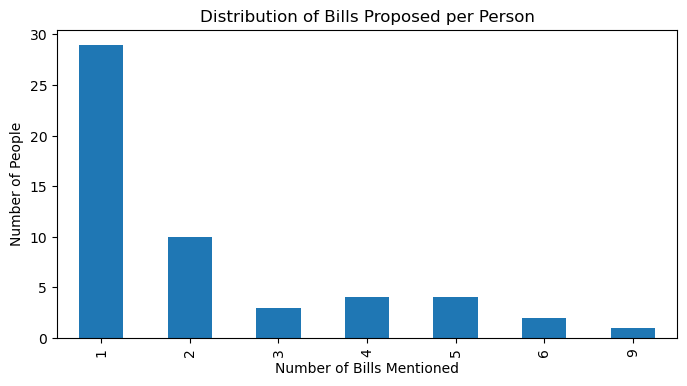

In [39]:
# Plot distribution
distribution.plot(kind='bar', figsize=(8,4))
plt.xlabel('Number of Bills Mentioned')
plt.ylabel('Number of People')
plt.title('Distribution of Bills Proposed per Person')
plt.show()

### Answers

Please see above for the count of unqiue bills for each person and for the distribution of the number of bills per person 
- Most people only proposed 1 bill (around 27 out of 53 people) which might suggest that individuals are usually only involved with one piece of legislation 
- There is a sharp drop off after 1 bill, with substantially fewer people proposing 2 bills
- Only a small number of individuals proposed more than 2 bills, with Mr. Takano proposing the most at 9 bills

## Question 3

### Now focus a subset of bills whose actions are marked as “senate amendment proposed (on the floor)”. An important feature of the text is that it can mention one or more senators.

### 3a. Produce a new dataset counting how many senators are mentioned per bill. This dataset should also include two variables, with the name of the first senator (Senator 1) mentioned in the bill and the name of the second senator (Senator 2). What is the distribution of number of senators per bill?

In [40]:
# Bills with senate amendment proposed (on the floor) actions 
sAmdt_floor = actions[actions['main_action'] == 'senate amendment proposed (on the floor)']

To search for sthe senators using regular expression, I will assume make the following assumptions:
- Senators are addressed by their last name 
- Their last name starts with a capital letter, and some last names might have multiple capital letters 
- Their last name could be double-barrelled, in which case there would be the first last name followed by a hyphen or a space followed by the second last name (beginning with capital letter)
- Their last names are directly after the word "Senator" or "senator" and a single space

In [46]:
# Looking through the "actions" column to find Senators 
senator_list = sAmdt_floor["action"].str.findall(r"(?:Senator|senator)\s[A-Z]{1}[A-Za-z]*|(?:Senator|senator)\s[A-Z]{1}[A-Za-z]*\-[A-Z]{1}[A-Za-z]*|(?:Senator|senator)\s[A-Z]{1}[A-Za-z]*\s[A-Z]{1}[A-Za-z]*")

# # Since findall returns a list, extract the element from the list (there is only one person per row) and convert to string
# people_list_copy = people_list_copy.apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

# Join the extracted names with the corresponding bill_id (row alignment so based on index)
senator_data = sAmdt_floor[['bill_id']].join(senator_list.rename('senators'))

# Count number of senators per row 
senator_data['sen_count'] = senator_data['senators'].apply(len)

# Create a new DataFrame with senator counts and names of first two senators
senator_data[['Senator 1', 'Senator 2']] = pd.DataFrame(senator_data['senators'].tolist(), index=senator_data.index)

# Senator count distribution
senator_distribution = senator_data['sen_count'].value_counts().sort_index()

display(senator_data)

,bill_id,senators,sen_count,Senator 1,Senator 2
0,1029s,"[Senator McConnell, Senator Cornyn]",2,Senator McConnell,Senator Cornyn
1,1031s,[Senator Hawley],1,Senator Hawley,None
2,1160s,"[Senator McConnell, Senator Smith]",2,Senator McConnell,Senator Smith
8,1253s,"[Senator Feinstein, Senator Cornyn]",2,Senator Feinstein,Senator Cornyn
11,1309s,"[Senator McConnell, Senator Cardin]",2,Senator McConnell,Senator Cardin
...,...,...,...,...,...
2947,6201hr,[Senator Johnson],1,Senator Johnson,None
2948,6201hr,[Senator Murray],1,Senator Murray,None
2949,6201hr,[Senator Paul],1,Senator Paul,None
3155,8337hr,[Senator McConnell],1,Senator McConnell,None


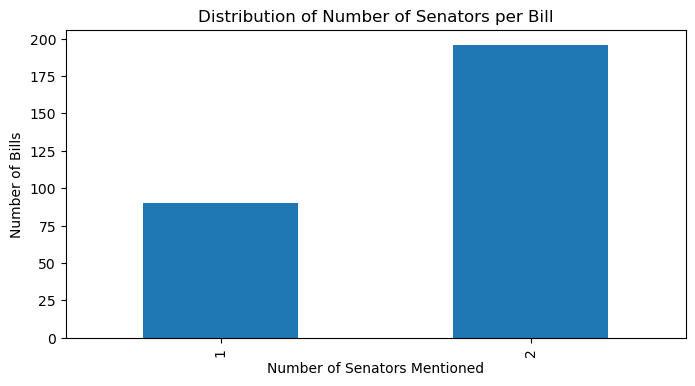

In [42]:
# Plot distribution
senator_distribution.plot(kind='bar', figsize=(8,4))
plt.xlabel('Number of Senators Mentioned')
plt.ylabel('Number of Bills')
plt.title('Distribution of Number of Senators per Bill')
plt.show()

#### Answers

Please see above for the distribution of the number of senators per bill
- The majority of bills (close to 200) mention 2 senators, which suggests that many legislative actions or amendments are sponsored or associated with two senators together 
- A smaller, but still substantial number of bills (around 100) mention only 1 senator, which implies that in a sizable portion of legislative actions, only one senator is directly involved or mentioned 
- Based on the data, no bills mention more than 2 senators being involved in the "senate amendment proposed (on the floor)" actions, which could be due to the nature of the legislative process or the specific action types being analyzed 

### 3b. With how many different people does each Senator 1 coauthor bills, i.e. how many different people appear as Senator 2 for each Senator 1?

In [47]:
# Filtering rows where both Senator 1 and Senator 2 exist 
# valid_senators = senator_data.dropna(subset=['Senator 1', 'Senator 2'])

# Grouping by Senator 1 and count unique Senator 2s
senator_coauthor_counts = senator_data.groupby('Senator 1')['Senator 2'].nunique().reset_index()

# Renaming column
senator_coauthor_counts = senator_coauthor_counts.rename(columns={'Senator 1': 'Senator', 'Senator 2': 'Unique Coauthors'})

# Sorting by unique coauthors 
senator_coauthor_counts = senator_coauthor_counts.sort_values(by = 'Unique Coauthors', ascending = False).reset_index(drop = True)


In [44]:
def create_table(ax, data):

    table = ax.table(cellText=data.values, 
                    colLabels=data.columns, 
                    cellLoc='center', 
                    loc='center')
    
    # Hide axes
    ax.axis('tight')
    ax.axis('off')

    # Formatting table 
    for (i, j), cell in table.get_celld().items():
        if i == 0: 
            cell.set_facecolor('blue')  
            cell.set_text_props(color='white', weight='bold', fontsize=10)  
        else:  
            pass
        cell.set_edgecolor('black')  

    # # Scale the table
    table.scale(1.0, 1.5)


#### Answers

The count of unique coauthors each senator 1 has is shown in the table below
- Senator McConnel has the most coauthors with 57 different senators appearing as coauthors (senator 2), which suggests that Senator McConnell has collaborated with a wide range of senators on various bills
- Senator Reed has the next highest number of coauthors at 25, indicating that he also engages in a considerable amount of collaborative legislative activity 
- Several senators have a moderate number of coauthors between 6 and 9, suggesting less collaboration compared to the most active senators 
- A notable group of senators, including Senator Feinstein, Senator Rubio, and Senator Menendez, each only have 1 coauthor, which could show that these senators may either collaborate sparingly or focus on specific partnerships 
- There are also quite a few senators that have no coauthors, such as Senator Udall, Senator Brown and Senator Wicker, which could indicate that these senators tend to work independently 

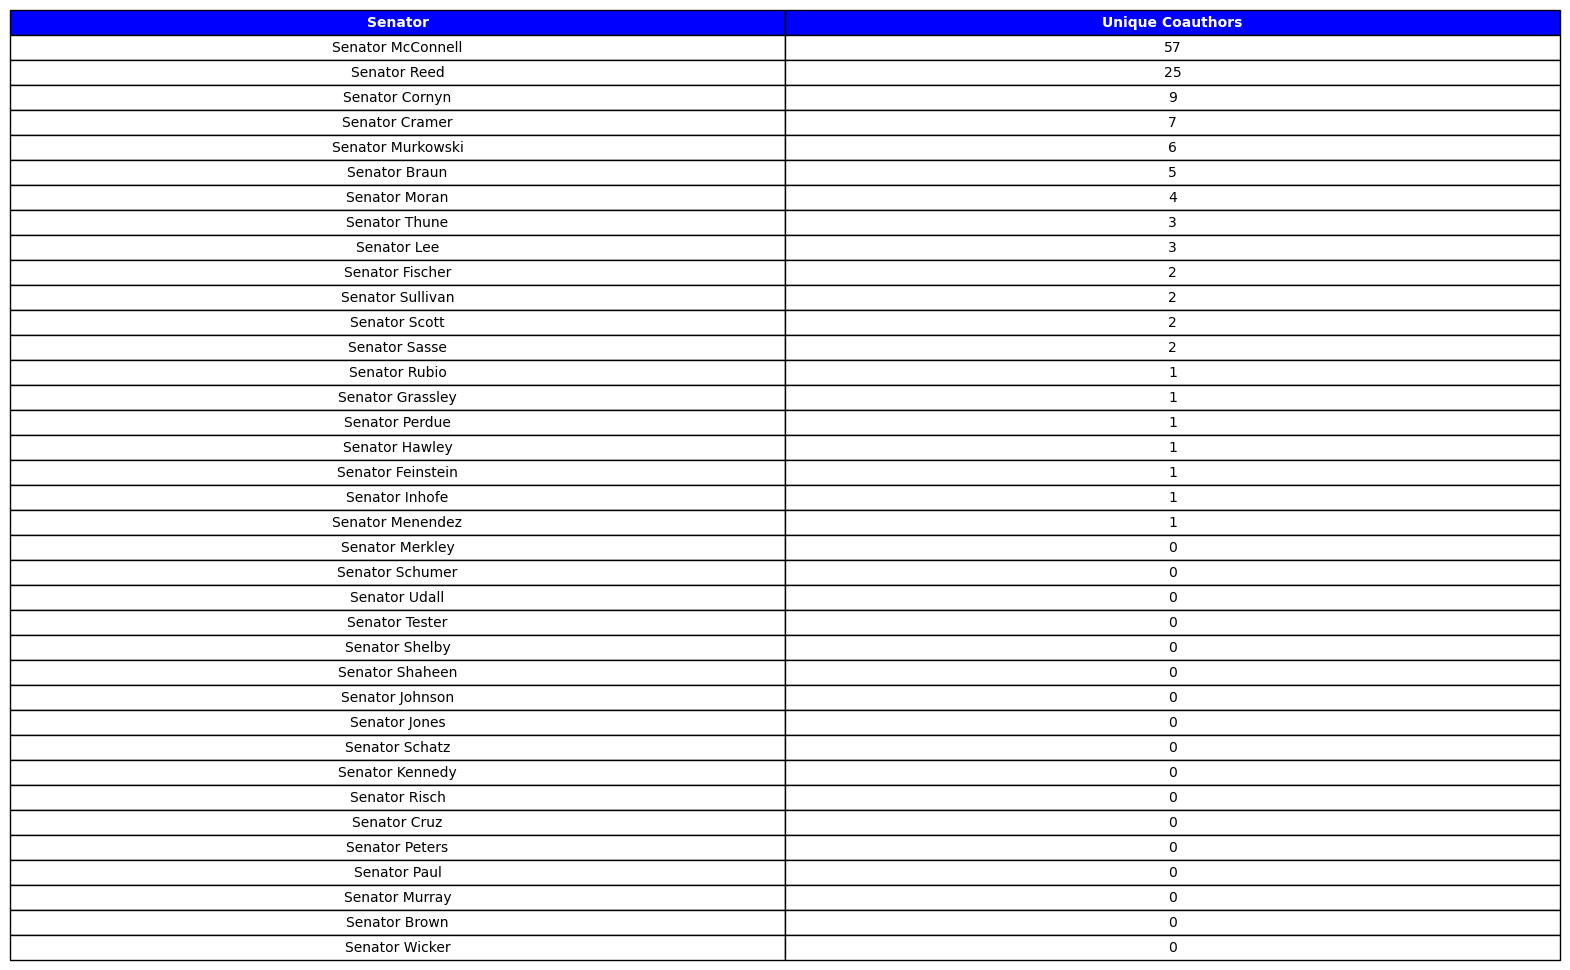

In [48]:
# Create a figure with two subplots (side by side)
fig, ax = plt.subplots(figsize=(20, 6))

# Assume table1_data and table2_data are your dataframes
create_table(ax, senator_coauthor_counts)

# Show the figure
plt.show()